In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from functions import *

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# load the data
data = pd.read_csv('../data/daily_prices_historical.csv')
data.head()

,date,value
0,1973-08-20,0.6735
1,1973-08-21,0.6710
2,1973-08-22,0.6580
3,1973-08-23,0.6675
4,1973-08-24,0.6660


In [3]:
data.tail()

,date,value
12024,2021-08-04,1.7565
12025,2021-08-05,1.7690
12026,2021-08-06,1.7600
12027,2021-08-09,1.7935
12028,2021-08-10,1.8200


---

In [4]:
# save the index of where the last year in the data begins (last year --> 2020-08-10 - 2021-08-10)
last_year_start_index = data[data['date']=='2020-08-10'].index[0]

In [5]:
# set 'date' as index
data.set_index(pd.DatetimeIndex(data['date']), inplace=True)

In [6]:
# sort the index
data.sort_index(inplace=True)

In [7]:
data.drop(columns='date',inplace=True)

In [8]:
data.shape

(12029, 1)

In [9]:
data.head()

,value
date,
1973-08-20,0.6735
1973-08-21,0.6710
1973-08-22,0.6580
1973-08-23,0.6675
1973-08-24,0.6660


---

In [10]:
# calculate the baseline
data['avg_value'] = [data['value'].mean() for _ in data['value']]

# baseline predictions
data['baseline_preds'] = data['value'] - data['avg_value']

In [11]:
data

,value,avg_value,baseline_preds
date,,,
1973-08-20,0.6735,1.258884,-0.585384
1973-08-21,0.6710,1.258884,-0.587884
1973-08-22,0.6580,1.258884,-0.600884
1973-08-23,0.6675,1.258884,-0.591384
1973-08-24,0.6660,1.258884,-0.592884
...,...,...,...
2021-08-04,1.7565,1.258884,0.497616
2021-08-05,1.7690,1.258884,0.510116
2021-08-06,1.7600,1.258884,0.501116


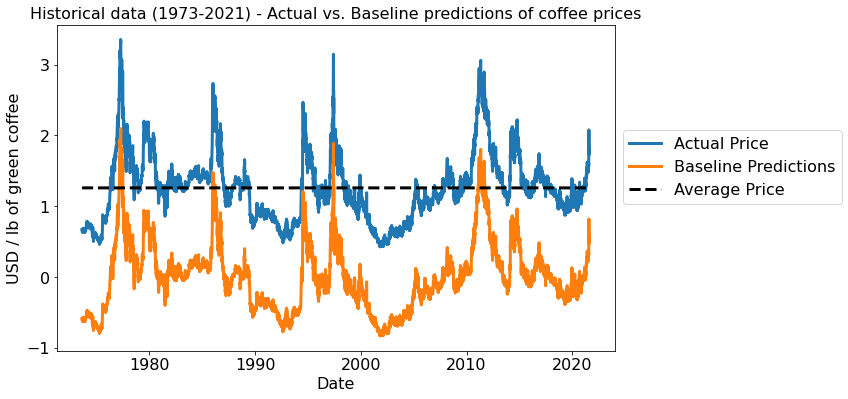

In [12]:
# plot the data, the average and the baseline predictions
plt.figure(figsize=(10,6))
plt.plot(data['value'], linewidth=3, color='tab:blue', label='Actual Price')
plt.plot(data['baseline_preds'], linewidth=3, color='tab:orange', label='Baseline Predictions')
plt.plot(data['avg_value'], linewidth=3, linestyle='--', color='black', label='Average Price')
plt.legend(prop = {'size':16}, bbox_to_anchor=(1, .7));
plt.ylabel('USD / lb of green coffee', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);
plt.title('Historical data (1973-2021) - Actual vs. Baseline predictions of coffee prices', fontsize=16);
plt.savefig('../images/plots/historical_daily_prices_actual_vs_baseline_predictions.jpeg')

In [12]:
# baseline MSE (mean squared error)
baseline_mse = mean_squared_error(data['value'], data['baseline_preds'])
baseline_mse

1.5847886667510982

In [13]:
# baseline MAPE (mean absolute percentage error)

baseline_mape = mape(data['value'], data['baseline_preds'])
baseline_mape

115.72851103921289

---

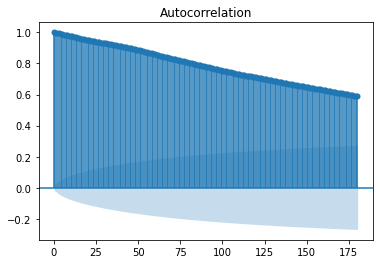

In [15]:
# plot auto-correlation function
plot_acf(data['value'].dropna(), lags = 180);

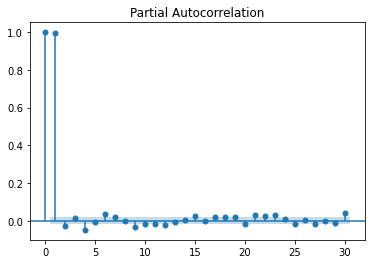

In [16]:
# plot the partial auto-correlation function
plot_pacf(data['value'].dropna(), lags=30);

In [17]:
# Augmented Dickey-Fuller test to check for stationarity
interpret_dftest(adfuller(data['value'].dropna()))

# evidence for stationarity of the data for alpha = 0.01

Test Statistic   -3.582503
p-value           0.006104
dtype: float64

In [18]:
len(np.unique(data.index.year)) # we have 49 years in the data

49

In [19]:
# components of the data
sd = seasonal_decompose(data['value'], period=49, extrapolate_trend='freq')

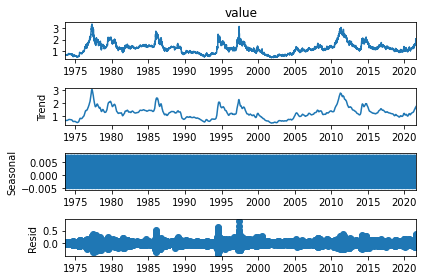

In [20]:
sd.plot();

---

In [12]:
data.drop(columns=['avg_value', 'baseline_preds'], inplace=True)

In [13]:
# train-test split
train = data.iloc[:last_year_start_index]
test = data.iloc[last_year_start_index:] # the last year in the data, from 2020-08-10 to 2021-08-10

In [14]:
train.shape

(11770, 1)

In [15]:
test.shape

(259, 1)

In [18]:
# gridsearch ARIMA models

arima_df = gs_arima(train_df = train, # data frame to train the model on
                    d=0,              # the lag value - based on ADF test
                    n_p=5,            # over how many values of p we want to gridsearch
                    n_q=5)            # over how many values of q we want to gridsearch

# this will take some time, depending on n_p and n_q: this will fit in total n_p * n_q models.

Fitting model: ARIMA(0, 0, 0)...
... done
Fitting model: ARIMA(0, 0, 1)...


C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


... done
Fitting model: ARIMA(0, 0, 2)...
... done
Fitting model: ARIMA(0, 0, 3)...
... done
Fitting model: ARIMA(0, 0, 4)...
... done
Fitting model: ARIMA(1, 0, 0)...
... done
Fitting model: ARIMA(1, 0, 1)...
... done
Fitting model: ARIMA(1, 0, 2)...
... done
Fitting model: ARIMA(1, 0, 3)...
... done
Fitting model: ARIMA(1, 0, 4)...
... done
Fitting model: ARIMA(2, 0, 0)...
... done
Fitting model: ARIMA(2, 0, 1)...
... done
Fitting model: ARIMA(2, 0, 2)...
... done
Fitting model: ARIMA(2, 0, 3)...
... done
Fitting model: ARIMA(2, 0, 4)...
... done
Fitting model: ARIMA(3, 0, 0)...
... done
Fitting model: ARIMA(3, 0, 1)...
... done
Fitting model: ARIMA(3, 0, 2)...
... done
Fitting model: ARIMA(3, 0, 3)...


C:\Users\Yair\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


... done
Fitting model: ARIMA(3, 0, 4)...
... done
Fitting model: ARIMA(4, 0, 0)...
... done
Fitting model: ARIMA(4, 0, 1)...
... done
Fitting model: ARIMA(4, 0, 2)...
... done
Fitting model: ARIMA(4, 0, 3)...
... done
Fitting model: ARIMA(4, 0, 4)...
... done


In [19]:
# index of the smalles AIC
best_model_ix = arima_df['AIC'].sort_values().index[0]
best_model_ix

17

In [20]:
# print the best model
arima_df.loc[best_model_ix, 'model']

'ARIMA(3, 0 ,2)'

In [16]:
# Instantiate model using the hyperparameters from the gridsearch's best model
model = ARIMA(endog = train.asfreq('D'), order = (3,0,2))

# Fit ARIMA model.
arima = model.fit(method_kwargs={'maxiter':5000})

In [17]:
# Generate predictions based on test set.
train_preds = arima.predict(start=train.index[0], # from where we want to predict --> from the first time stamp on y_test
                            end=train.index[-1] # until where we want to predict --> until the last time stamp on y_test
                            )

test_preds = arima.predict(start=test.index[0],
                           end=test.index[-1])

In [18]:
train_mse = mean_squared_error(train, train_preds[train.index])

In [19]:
test_mse = mean_squared_error(test, test_preds[test.index])

In [20]:
print(f'Training MSE: {train_mse}.')
print(f'Testing MSE: {test_mse}')

Training MSE: 0.0009869825402108211.
Testing MSE: 0.07190490532309338


In [21]:
mape(train, train_preds)

47.766443630443966

In [22]:
mape(test, test_preds)

13.364976944743

In [23]:
test.index

DatetimeIndex(['2020-08-10', '2020-08-11', '2020-08-12', '2020-08-13',
               '2020-08-14', '2020-08-17', '2020-08-18', '2020-08-19',
               '2020-08-20', '2020-08-21',
               ...
               '2021-07-28', '2021-07-29', '2021-07-30', '2021-08-02',
               '2021-08-03', '2021-08-04', '2021-08-05', '2021-08-06',
               '2021-08-09', '2021-08-10'],
              dtype='datetime64[ns]', name='date', length=259, freq=None)

In [24]:
# titles for plot
arima_order = (3,0,2)
plot_title = f'Daily coffee prices - international market (1973-2021)\nWith ARIMA({arima_order[0]}, {arima_order[1]}, {arima_order[2]}) Predictions'
y_label = 'USD / lb of green coffee'
x_label = 'Date'

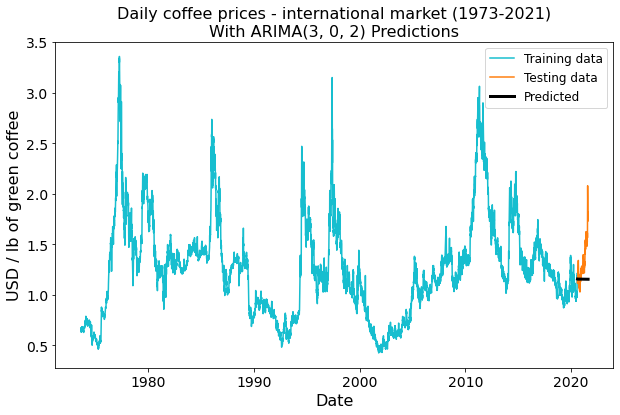

In [36]:
# plotting ARIMA results
fig = plot_arima_data(train_df = train, test_df = test, test_preds = test_preds, 
                      x_label = x_label,
                      y_label = y_label,
                      arima_order = arima_order,
                      plot_title = plot_title
                     )

fig.savefig('../images/plots/ARIMA/daily_prices_historical_arima2.jpeg')

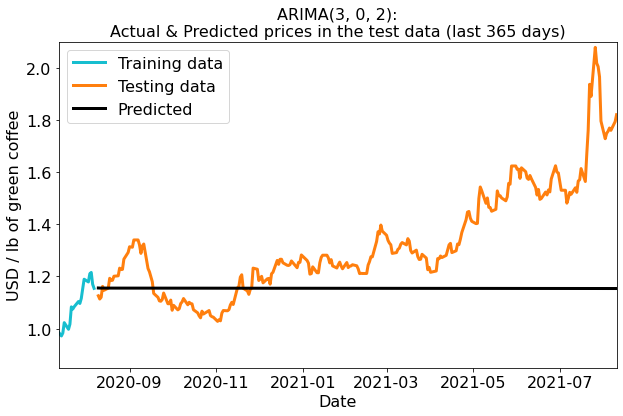

In [30]:
## Zooming in on the plot to focus on our predictions
plot_title = f'ARIMA({arima_order[0]}, {arima_order[1]}, {arima_order[2]}):\nActual & Predicted prices in the test data (last 365 days)'

fig = plot_arima_data_zoomed(train_df = train, test_df = test, test_preds = test_preds, 
                             x_label = x_label,
                             y_label = y_label,
                             arima_order = (3,0,2),
                             plot_title = plot_title
                            )

fig.savefig('../images/plots/ARIMA/daily_prices_historical_arima_zoomed.jpeg')

In [39]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                17155
Model:                 ARIMA(3, 0, 2)   Log Likelihood               24027.428
Date:                Wed, 18 Aug 2021   AIC                         -48040.857
Time:                        16:31:06   BIC                         -47986.607
Sample:                    08-20-1973   HQIC                        -48022.975
                         - 08-07-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1378      1.147      0.992      0.321      -1.111       3.387
ar.L1         -0.0786      0.033     -2.363      0.018      -0.144      -0.013
ar.L2          0.6405      0.018     35.096      0.000       0.605       0.676
ar.L3          0.4374      0.032     13.643      0.000       0.375       0.500
ma.L1          1.0220      0.034     29.669      0.000       0.954       1.089
ma.L2          0.3041      0.034      9.075      0.000       0.238       0.370
sigma2         0.0008    4.5e-06    174.137      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                  46.02   Jarque-Bera (JB):            297450.17
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

---